    Algoritmo de Evolução Diferencial


- O algoritmo de evolução diferencial é um tipo de algoritmo evolutivo que se distingue pela forma como realiza a etapa de mutação;
- A cada iteração, cada indivíduo da população pode ser substituído por um descendente resultante da recombinação dele próprio e uma mutação gerada a partir de 03 outros indivíduos;
- As mutações são resultado da soma das features de um indivíduo com a diferença entre as features de outros dois indivíduos ponderada por um fator de escala $F$
> $\mu = r_1 + F(r_2 - r_3)$

- Esse formato corresponde a variação padrão `(rand / 1 / bin)` deste algoritmo;
- Outras variações disponíveis na literatura não são abordadas aqui;


| Aluno | Matrícula | e-mail |
| :--- | :--- | :--- |
| Gustavo Ribeiro | 2016026329 | gustavo435@ufmg.br |
| Hebert Costa | 2016097439 | hebert15@ufmg.br |

Imports

In [6]:
import typing
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D 

#### Implementação do Algoritmo

Inspired by [this](https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/#lets-start) awesome article

In [18]:

def diffEvolution(
    fObj: typing.Callable, bounds: list, nPopulation: int,
    mutationRate=0.8, crossoverProb=0.7, maxEpochs=1000,
) -> typing.Generator[tuple, None, None]:
    
    # Initialize population
    nDimensions = len(bounds)
    minB, maxB = np.asarray(bounds).T
    diff = np.fabs(minB - maxB)
    
    populationNorm = np.random.rand(nPopulation, nDimensions)
    population = minB + populationNorm*diff
    
    # Initialize population fitness vector
    fitness = np.asarray([fObj(i) for i in population]) # 'i' stands for 'individuals'
    bestIdx = np.argmin(fitness)
    best = population[bestIdx]
    
    for i in range(maxEpochs):
        for j in range(nPopulation):
            
            # Mutation
            idxs = [idx for idx in range(nPopulation) if idx != j]
            r1, r2, r3 = populationNorm[np.random.choice(idxs, 3, replace=False)]
            mutant = np.clip(r1 + mutationRate * (r2 - r3), 0, 1)
            
            # Recombination
            crossoverPoints = np.random.rand(nDimensions) < crossoverProb
            if not np.any(crossoverPoints):
                crossoverPoints[np.random.randint(0, nDimensions)] = True
            
            candidateNorm = np.where(crossoverPoints, mutant, populationNorm[j])
            candidate = minB + candidateNorm*diff
            
            # Evaluation
            f = fObj(candidate)
            if f < fitness[j]:
                fitness[j] = f
                populationNorm[j] = candidateNorm
                
                if f < fitness[bestIdx]:
                    bestIdx = j
                    best = candidate
        
        yield best, fitness[bestIdx]




### Problema Rastringin 

Função Objetivo

In [8]:
rastrigin = lambda X: (X[0]**2 - 10 * np.cos(2 * np.pi * X[0])) + (X[1]**2 - 10 * np.cos(2 * np.pi * X[1])) + 20

Otimização

In [20]:

n = 100;
bounds1 = (-2, 2)
bounds2 = (-2, 2)

generator = diffEvolution(
    fObj=rastrigin, bounds=[bounds1, bounds2], nPopulation=n,
    mutationRate=0.8, crossoverProb=0.7, maxEpochs=1000,
)

xHat = list(generator)[-1]
xHat

(array([1.48437262e-10, 9.49620826e-10]), 0.0)

Plot

/tmp/ipykernel_41721/2702451729.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


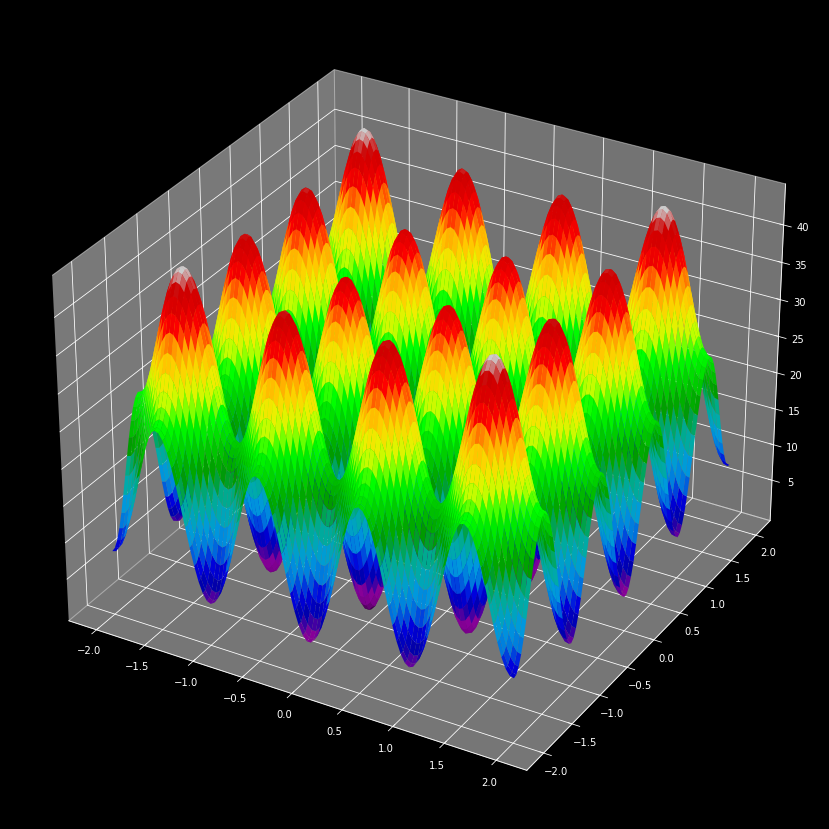

<a list of 379 text.Text objects>

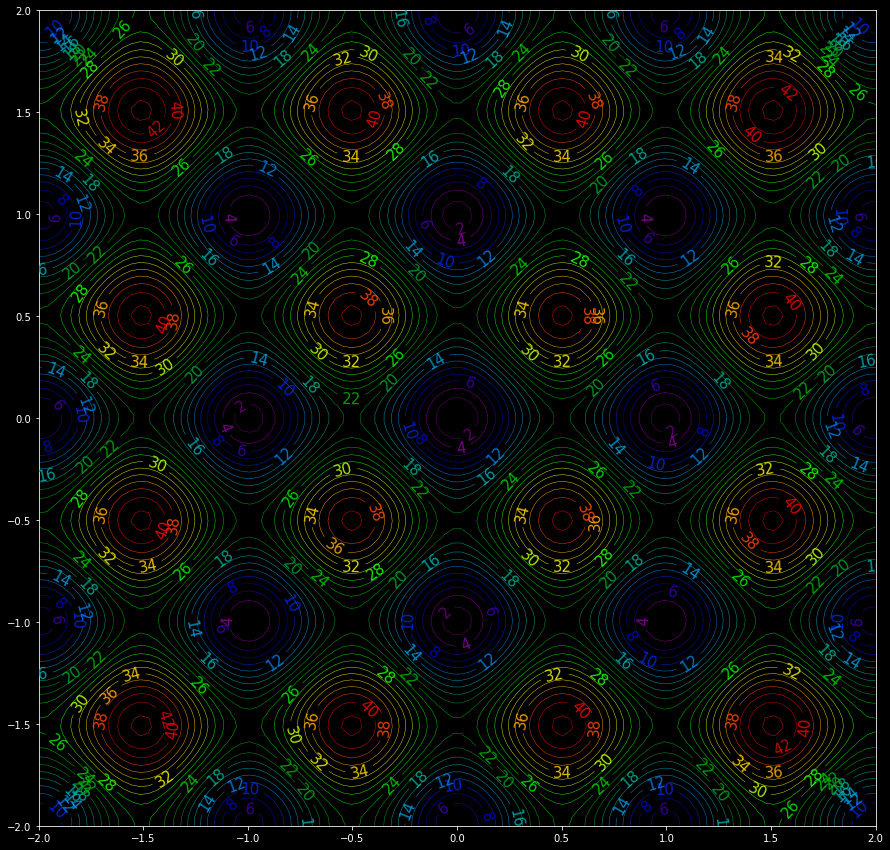

In [23]:

# Build plot data 
min1, max1 = bounds1
min2, max2 = bounds2

x1 = np.linspace(min1, max1, n)     
x2 = np.linspace(min2, max2, n)     
X1, X2 = np.meshgrid(x1, x2) 
Z = rastrigin([X1, X2])

# Plot surface 
fig = plt.figure(figsize=(15, 15)) 
ax = fig.gca(projection='3d')
ax.plot_surface(
  X1, X2, Z,
  rstride=1, cstride=1, cmap=plt.cm.nipy_spectral, linewidth=0.08, antialiased=True
)
plt.show()

# Plot contour
fig, ax = plt.subplots(figsize=(15, 15))
CS = ax.contour(X1, X2, Z, cmap=plt.cm.nipy_spectral, alpha=.9, locator=matplotlib.ticker.MaxNLocator(nbins=25), linewidths=.5)
ax.clabel(CS, CS.levels, inline=True, fontsize=15)


### Função Peaks

Função

In [13]:
peaks = lambda X: \
    (3*(1 - X[0])**2 * np.exp(-X[0]**2 - (X[1] + 1)**2)) \
    + (-10*(X[0] / 5 - X[0]**3 - X[1]**5) * np.exp(-X[0]**2 - X[1]**2)) \
    + (-(1 / 3) * np.exp(-(X[0] + 1)**2 - X[1]**2))

Otimização

In [19]:
n = 10
bounds1 = (-3, 3)
bounds2 = (-3, 3)

generator = diffEvolution(
    fObj=peaks, bounds=[bounds1, bounds2], nPopulation=n,
    mutationRate=0.8, crossoverProb=0.7, maxEpochs=1000,
)

xHat = list(generator)[-1]
xHat

(array([ 0.22827892, -1.62553496]), -6.551133332835842)

Plot

/tmp/ipykernel_41721/3818114064.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


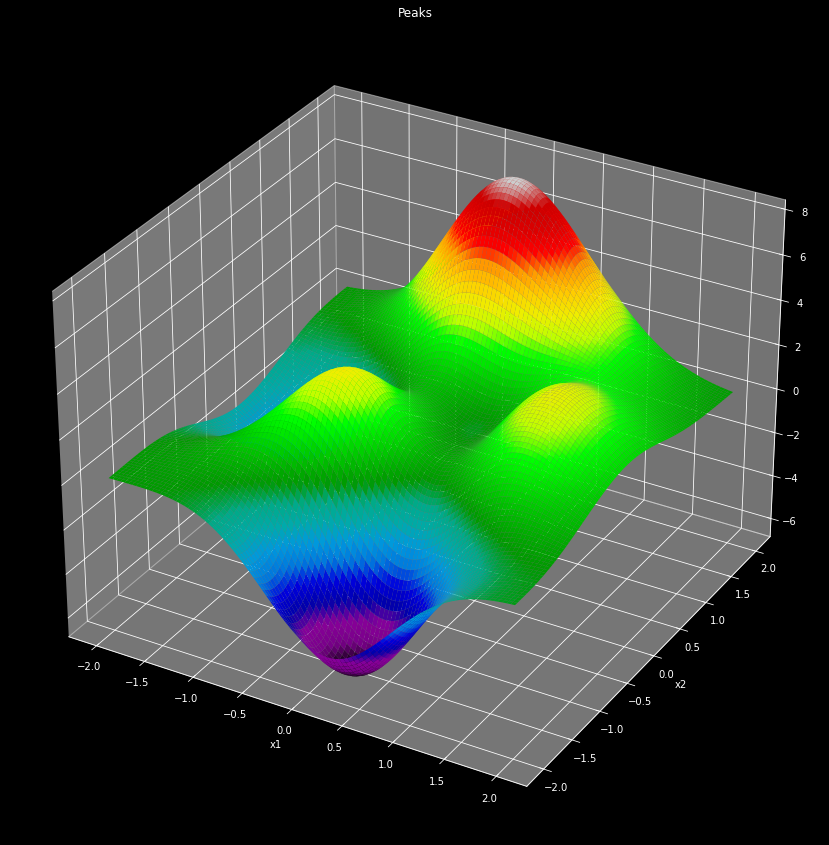

Text(0, 0.5, 'x2')

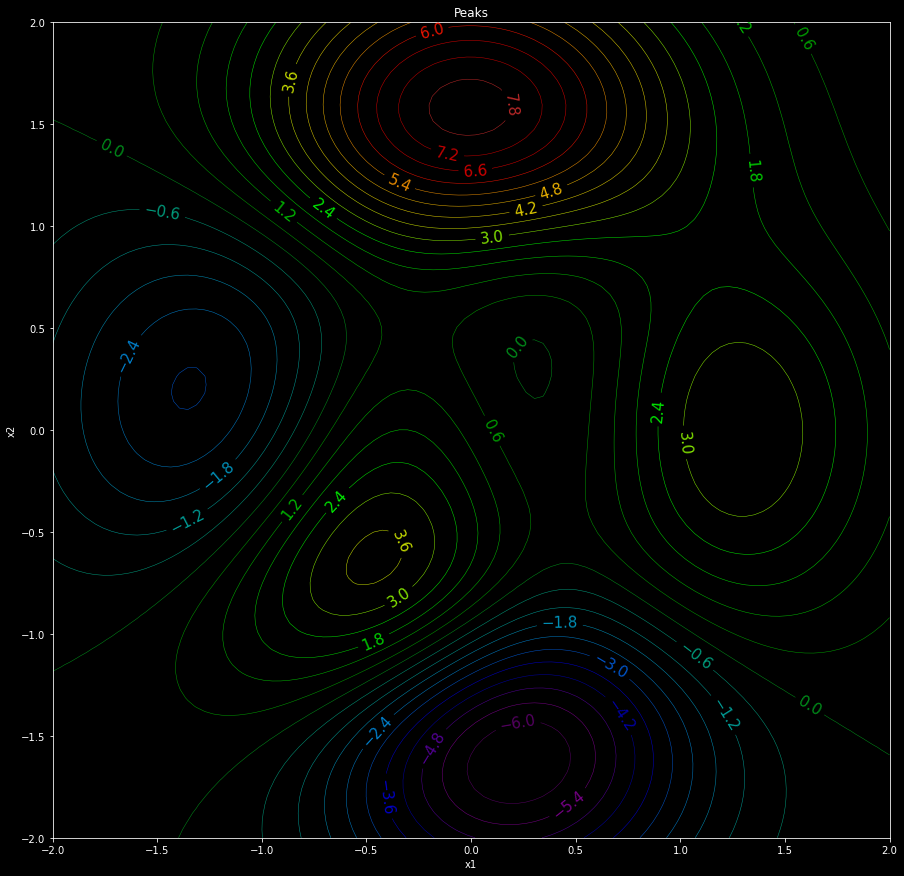

In [24]:

# Build plot data 
min1, max1 = bounds1
min2, max2 = bounds2

x1 = np.linspace(min1, max1, n)
x2 = np.linspace(min2, max2, n)
X1, X2 = np.meshgrid(x1, x2)
Z = peaks(np.array([X1, X2]))

# Plot surface
fig = plt.figure(figsize=(15, 15)) 
ax = fig.gca(projection='3d')
ax.plot_surface(
  X1, X2, Z,
  rstride=1, cstride=1, cmap=plt.cm.nipy_spectral, linewidth=0.08, antialiased=True
)

ax.set_title('Peaks')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Plot contour
fig, ax = plt.subplots(figsize=(15, 15))
CS = ax.contour(X1, X2, Z, cmap=plt.cm.nipy_spectral, alpha=.9, locator=matplotlib.ticker.MaxNLocator(nbins=25), linewidths=.5)
ax.clabel(CS, CS.levels, inline=True, fontsize=15)

ax.set_title('Peaks')
plt.xlabel('x1')
plt.ylabel('x2')